In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [4]:
df = pd.read_csv("kc_house_data.csv")
df.head()


,price,floors,area
0,221900,1.0,1340
1,538000,2.0,1690
2,180000,1.0,2720
3,604000,1.0,1360
4,510000,1.0,1800


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   21613 non-null  int64  
 1   floors  21613 non-null  float64
 2   area    21613 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 506.7 KB


,0
price,0
floors,0
area,0


In [6]:
X = df[["floors", "area"]]
y = df["price"]


In [7]:
# Transform target to reduce skew
y_log = np.log1p(y)


In [8]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

model.fit(X_train_scaled, y_train_log)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500,
                          random_state=42)

In [11]:
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Reverse log transform
y_test_actual = np.expm1(y_test_log)


In [12]:
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")


MAE: 175,101.42
RMSE: 309,376.31


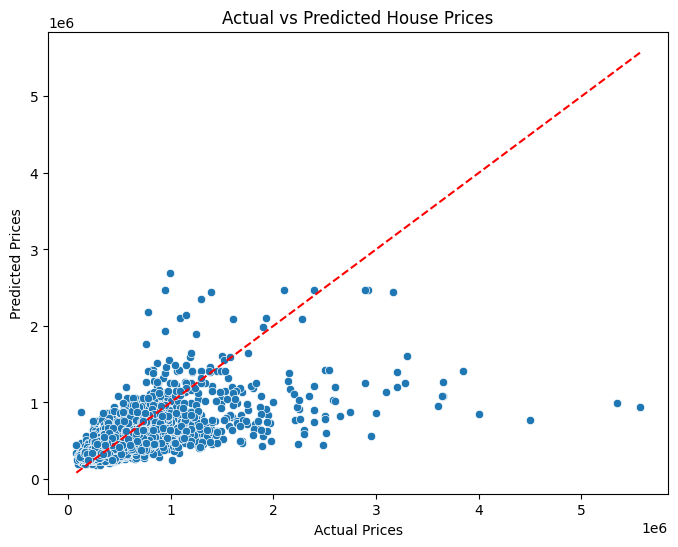

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_actual, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.show()
